## CRISP-DM Phase 2. Data Understanding

The data understanding phase starts with initial data collection and proceeds with activities that enable exploring the data, identify data quality problems, discover first insights into the data, and/or detect interesting subsets to form hypotheses.

In [2]:
# Importing libraries
import sys
sys.path.append('../src')
import utils
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from itertools import combinations
import warnings 
warnings.filterwarnings('ignore')

### Data Collection / Loading

In [3]:
# Load data
df: pd.DataFrame = utils.load_original_data()

df.head()

,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
0,1,1,0.010636,1.2810,0.022934,0.87454,1.21640,0.060940,0.188270,0.52510,...,85.437,27.07,26.102,16.000,16.0,0.2,22,0.060390,30,49
1,1,2,-0.455970,1.2700,0.006454,0.82067,1.00490,-0.014080,0.181040,0.62288,...,107.090,31.31,30.194,17.000,16.0,0.4,22,0.010636,31,50
2,1,3,-0.325390,1.0529,-0.059379,0.92242,0.72926,0.020476,0.044865,0.43292,...,120.870,36.07,35.273,17.000,15.0,-0.2,22,-0.455970,32,51
3,1,4,-0.566570,1.1131,-0.015229,0.85888,0.80974,0.076037,0.091033,0.67546,...,54.806,39.80,38.377,17.167,16.0,5.6,22,-0.325390,33,52
4,2,1,1.357300,1.0623,0.107020,0.81460,0.83593,0.199960,0.047800,0.74200,...,85.437,27.07,26.102,16.000,16.0,0.2,29,1.251000,7,27


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3672 entries, 0 to 3671
Data columns (total 86 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company             3672 non-null   int64  
 1   Time                3672 non-null   int64  
 2   Financial Distress  3672 non-null   float64
 3   x1                  3672 non-null   float64
 4   x2                  3672 non-null   float64
 5   x3                  3672 non-null   float64
 6   x4                  3672 non-null   float64
 7   x5                  3672 non-null   float64
 8   x6                  3672 non-null   float64
 9   x7                  3672 non-null   float64
 10  x8                  3672 non-null   float64
 11  x9                  3672 non-null   float64
 12  x10                 3672 non-null   float64
 13  x11                 3672 non-null   float64
 14  x12                 3672 non-null   float64
 15  x13                 3672 non-null   float64
 16  x14   

### Describe Data

In [82]:
if len(df.select_dtypes(include=["object"]).columns) == 0:
    print("There isn't categorical data")
else:
    df.describe(include=["object"])

There isn't categorical data


In [83]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Company,3672.0,182.084423,117.024636,1.00000,80.000000,168.000000,264.250000,422.00000
Time,3672.0,7.528322,4.064016,1.00000,4.000000,7.000000,11.000000,14.00000
Financial Distress,3672.0,1.040257,2.652227,-8.63170,0.172275,0.583805,1.351750,128.40000
x1,3672.0,1.387820,1.452926,0.07517,0.952145,1.183600,1.506475,51.95400
x2,3672.0,0.129706,0.120013,-0.25808,0.048701,0.107530,0.188685,0.74941
...,...,...,...,...,...,...,...,...
x79,3672.0,-2.664305,8.192663,-20.20000,-7.000000,0.200000,2.100000,8.60000
x80,3672.0,19.714597,7.508588,1.00000,14.000000,20.000000,26.000000,37.00000
x81,3672.0,1.100488,2.666733,-0.49922,0.189912,0.594765,1.355050,128.40000
x82,3672.0,13.122277,9.465907,1.00000,6.000000,11.000000,17.000000,49.00000


In [10]:
# Check Time column 
if df["Time"].is_monotonic_increasing:
    print("Time column is monotonic increasing, meaning that the data is ordered by time")
else:
    print("Time column is not monotonic increasing, meaning that the data is not ordered by time")

Time column is not monotonic increasing, meaning that the data is not ordered by time


In [84]:
print("Number of companies:",df.Company.unique().shape[0])
print("Number of time periods per company:")
print(pd.crosstab(df.Company, df.Time.sum()))

Number of companies: 422
Number of time periods per company:
col_0    27644
Company       
1            4
2           14
3            1
4           14
5           14
...        ...
418          2
419          3
420          3
421          6
422          8

[422 rows x 1 columns]


In [85]:
# Take a look at the data based on Groups per Company
grouped_company = df.groupby('Company')


group_gen = ((name, group) for name, group in grouped_company)
for name, group in itertools.islice(group_gen, 3):
    # For each group, print and show the data
    print('-------------------------------------')
    print("Data of Company", name)
    print(group.head())

-------------------------------------
Data of Company 1
   Company  Time  Financial Distress      x1        x2       x3       x4  \
0        1     1            0.010636  1.2810  0.022934  0.87454  1.21640   
1        1     2           -0.455970  1.2700  0.006454  0.82067  1.00490   
2        1     3           -0.325390  1.0529 -0.059379  0.92242  0.72926   
3        1     4           -0.566570  1.1131 -0.015229  0.85888  0.80974   

         x5        x6       x7  ...      x74    x75     x76     x77   x78  \
0  0.060940  0.188270  0.52510  ...   85.437  27.07  26.102  16.000  16.0   
1 -0.014080  0.181040  0.62288  ...  107.090  31.31  30.194  17.000  16.0   
2  0.020476  0.044865  0.43292  ...  120.870  36.07  35.273  17.000  15.0   
3  0.076037  0.091033  0.67546  ...   54.806  39.80  38.377  17.167  16.0   

   x79  x80       x81  x82  x83  
0  0.2   22  0.060390   30   49  
1  0.4   22  0.010636   31   50  
2 -0.2   22 -0.455970   32   51  
3  5.6   22 -0.325390   33   52  

[4 row

### Explore Data

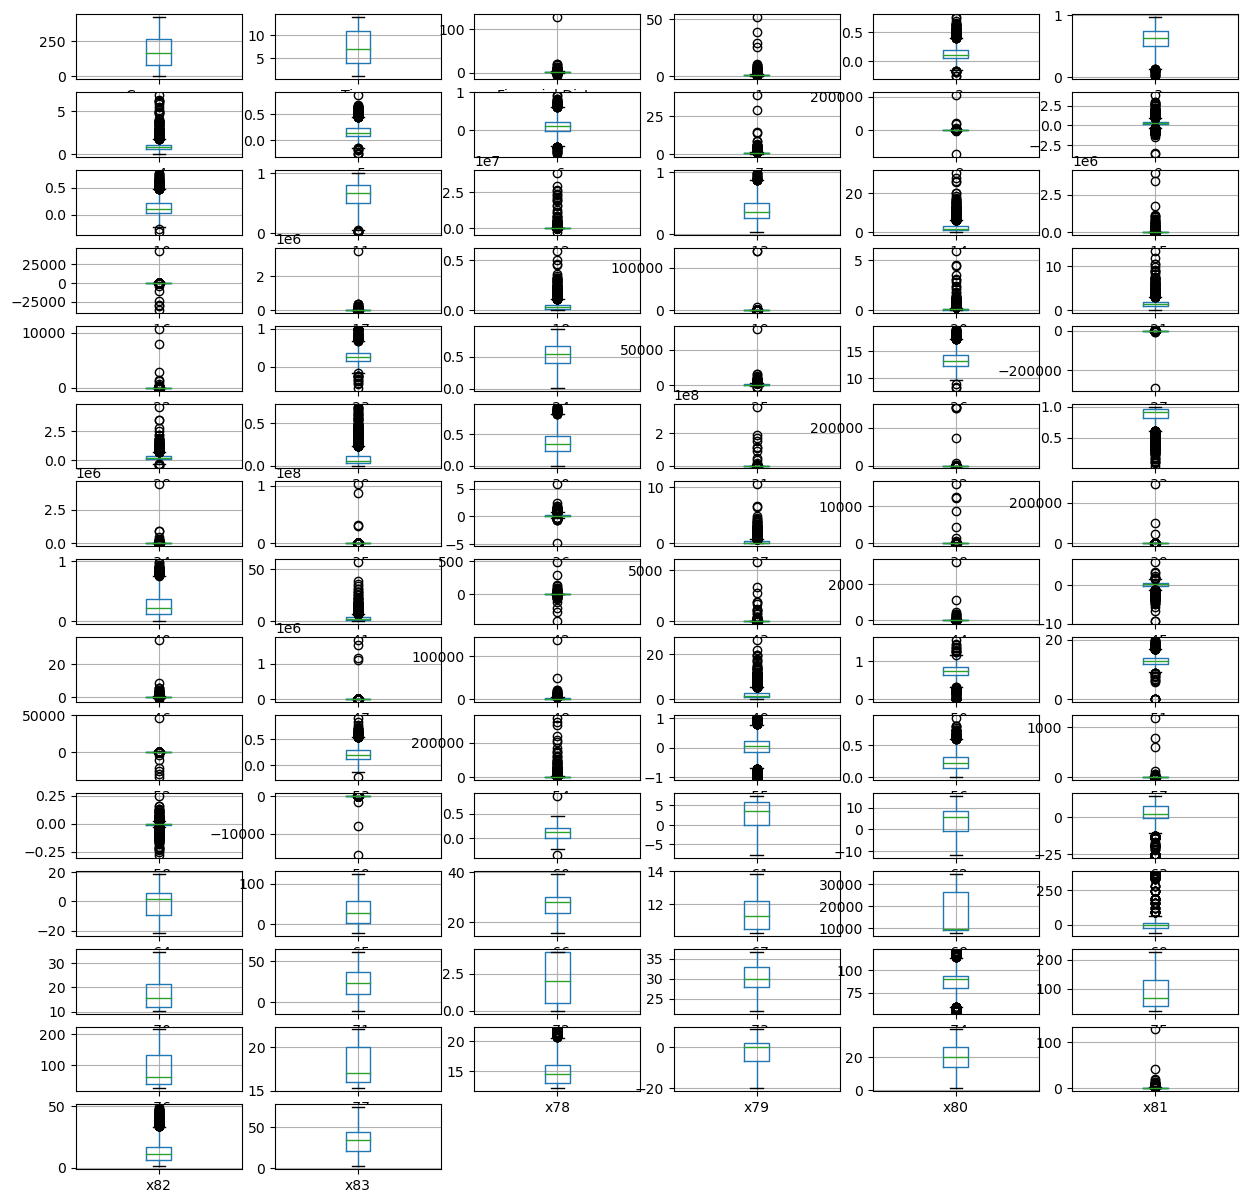

In [86]:
# boxplot for outliers detection
fig = plt.figure(figsize=(15, 15))
for i, col in enumerate(df.columns):
    fig.add_subplot(15, 6, i+1)
    df.boxplot(column=col)
plt.show()

Pearson correlation is commonly used to determine the association between two continuous variables.
Many frameworks, like pandas, have it as their default correlation metric.

Beacause Pearson correlation only measures the linear relationship, Spearman correlation is a better alternative.
It assesses monotonicity, which can be linear as well as nonlinear.

In [68]:
debug = False
if debug:
    corr = df.corr(method='spearman')
    passed = set()
    for (r,c) in combinations(df.columns, 2):
        #print("Correlation between", r, "and", c, "is", df[r].corr(df[c], method='spearman'))
        if (abs(corr.loc[r,c]) >= 0.5):
            passed.add(r)
            passed.add(c)
    print("Passed:", passed)

Passed: {'Financial Distress', 'x37', 'x33', 'x66', 'x46', 'x73', 'x75', 'x38', 'x45', 'x23', 'x44', 'x15', 'x16', 'x42', 'x1', 'x59', 'x3', 'x72', 'x70', 'x18', 'x48', 'x41', 'x30', 'x26', 'x69', 'x9', 'x83', 'x62', 'x77', 'x67', 'x21', 'x47', 'Time', 'x54', 'x35', 'x79', 'x7', 'x50', 'x40', 'x13', 'x12', 'x63', 'x64', 'x68', 'x53', 'x17', 'x36', 'x4', 'x19', 'x32', 'x82', 'x78', 'x5', 'x20', 'x8', 'x49', 'x11', 'x51', 'x10', 'x58', 'x24', 'x6', 'x61', 'x2', 'x14', 'x39', 'x76', 'x52', 'x34', 'x22', 'x56', 'x29', 'x25', 'x55', 'x43', 'x81'}


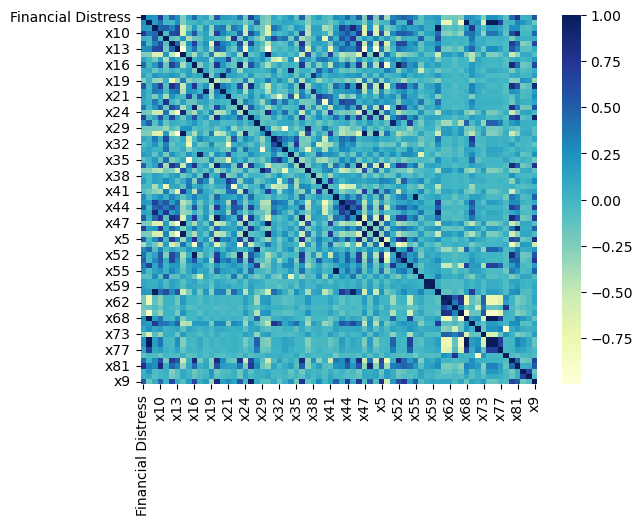

In [12]:
# Because of the high number of features, we will use a filtered heatmap to observe the correlation
# between features with a correlation higher than 0.6

corrDf = df.corr(method='spearman')
sns.heatmap(utils.filtered_heatmap(corrDf,0.6),cmap="YlGnBu")
plt.show()

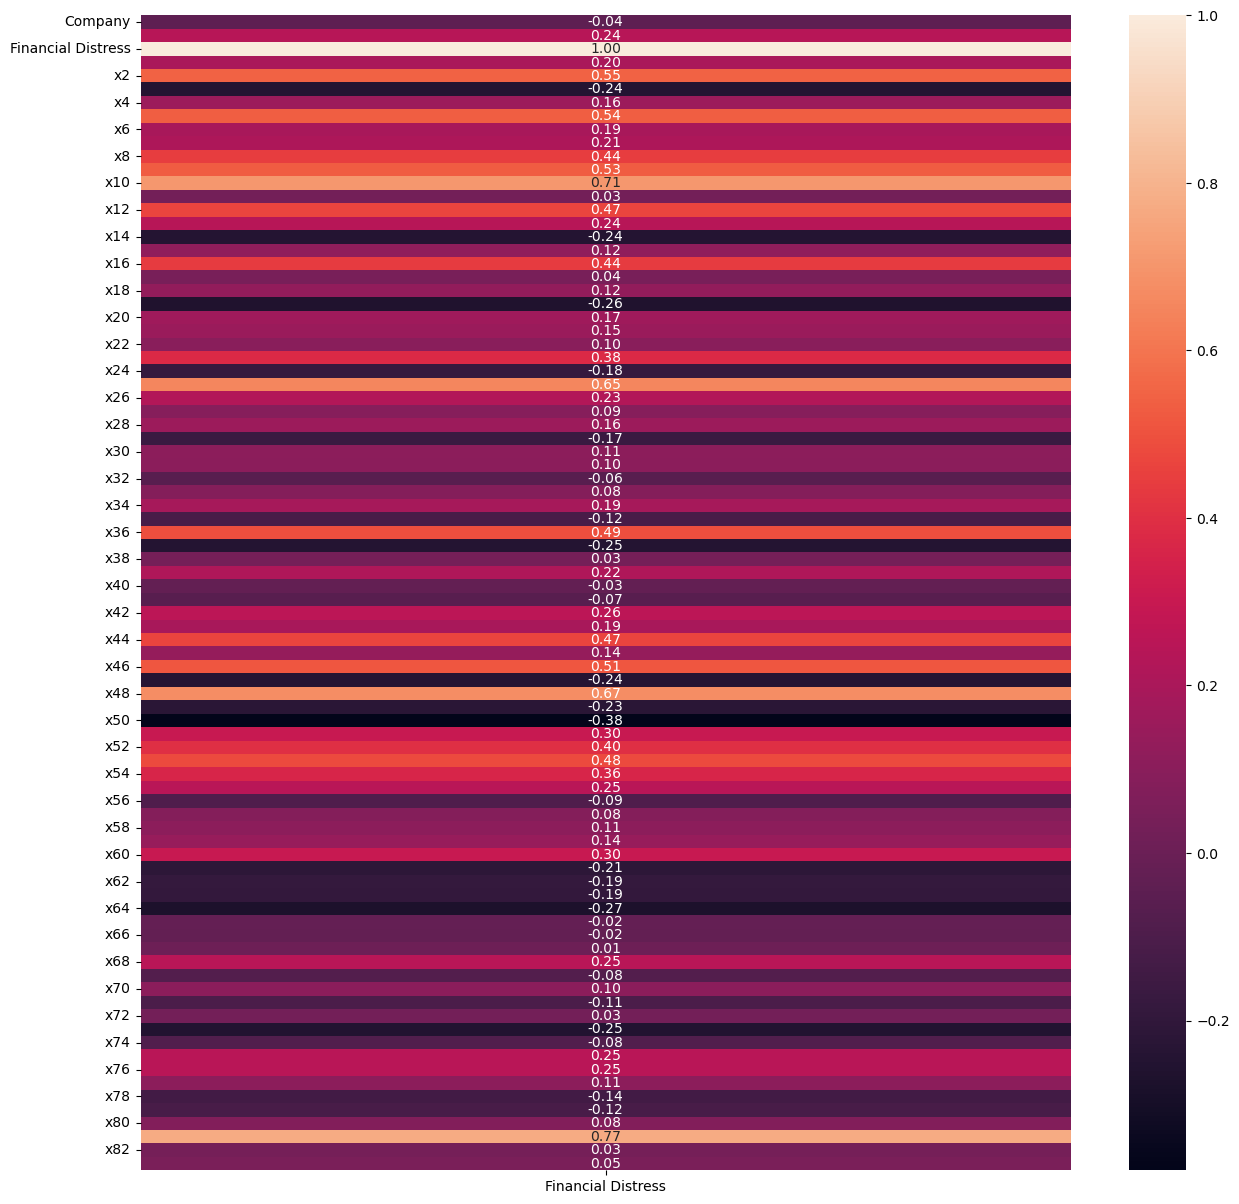

Features with higher correlation with target are: 
 x2     0.545499
x5     0.535373
x9     0.526539
x10    0.705014
x25    0.651039
x46    0.512028
x48    0.672074
x81    0.773710
Name: Financial Distress, dtype: float64


In [13]:
# spearman correlation between features and target
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(method='spearman')[['Financial Distress']], annot=True, fmt='.2f')
plt.show()

# Retrive the features with the highest correlation
corr = df.corr(method='spearman')
corr_target = abs(corr['Financial Distress'])
relevant_features = corr_target[corr_target > 0.5]
relevant_features = relevant_features.drop('Financial Distress')
print("Features with higher correlation with target are: \n", relevant_features)

### Verify Data Quality

#### Duplicated Values

In [27]:
print("Number of duplicated rows:", df.duplicated().sum())

Number of duplicated rows: 0


#### Missing values

In [18]:
missing_values = df.isnull().sum()
print(missing_values)
print("Number of rows with missing values:", df.isnull().any(axis=1).sum())

missing_values = missing_values[missing_values > 0]
if missing_values.shape:
    missing_values.sort_values(inplace=True)
    missing_values.plot.bar()
    plt.show()

Company               0
Time                  0
Financial Distress    0
x1                    0
x2                    0
                     ..
x79                   0
x80                   0
x81                   0
x82                   0
x83                   0
Length: 86, dtype: int64
Number of rows with missing values: 0


### Outlier Analysis

In [28]:
outliers = utils.id_outliers(df)
print("Total number of outliers: {} in {} data points".format(outliers["n_outliers"].sum(), sum(df.count())))
outliers

Total number of outliers: 16503 in 315792 data points


,lower_bound,upper_bound,n_outliers
Company,-196.375000,540.625000,0
Time,-6.500000,21.500000,0
Financial Distress,-1.596938,3.120963,312
x1,0.120650,2.337970,258
x2,-0.161276,0.398661,120
...,...,...,...
x79,-20.650000,15.750000,0
x80,-4.000000,44.000000,0
x81,-1.557794,3.102756,263
x82,-10.500000,33.500000,205


#### Imbalanced Data

Imbalanced data can lead to bias in ML models. This means that the model is more accurate in predicting specific outcomes and less accurate in predicting others. 

In [16]:
# Counting number of observations for Healthy and and Bankrupt Companies:
print("Numer of observations of Bankrupt Companies:") 
print(df[df['Financial Distress'] < -0.5].shape[0])

print("Numer of observations of Healthy Companies:")
print(df[df['Financial Distress'] >= -0.5].shape[0])

Numer of observations of Bankrupt Companies:
136
Numer of observations of Healthy Companies:
3536


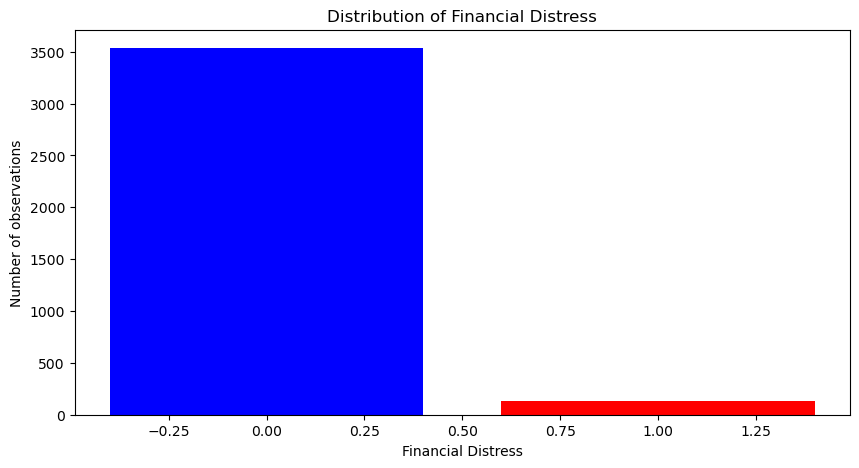

In [7]:
# Plotting the distribution of the target variable (use num_ones and num_zeros to plot the graph)
plt.figure(figsize=(10, 5))
plt.bar([0,1],[df[df['Financial Distress'] >= -0.5].shape[0],df[df['Financial Distress'] < -0.5].shape[0]], color=['blue','red'])
plt.xlabel('Financial Distress')
plt.ylabel('Number of observations')
plt.title('Distribution of Financial Distress')
plt.show()

- We can conclude that the data is unbalanced